In [2]:
pip install pytrends matplotlib seaborn plotly pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# PyTrends Setup 

In [19]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "Artificial intelligence"

# Data Request 

In [20]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop= '')

# Country_Wise_Interest

In [21]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

# Bar Plot (Top_15_Countries)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2304\1548046019.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




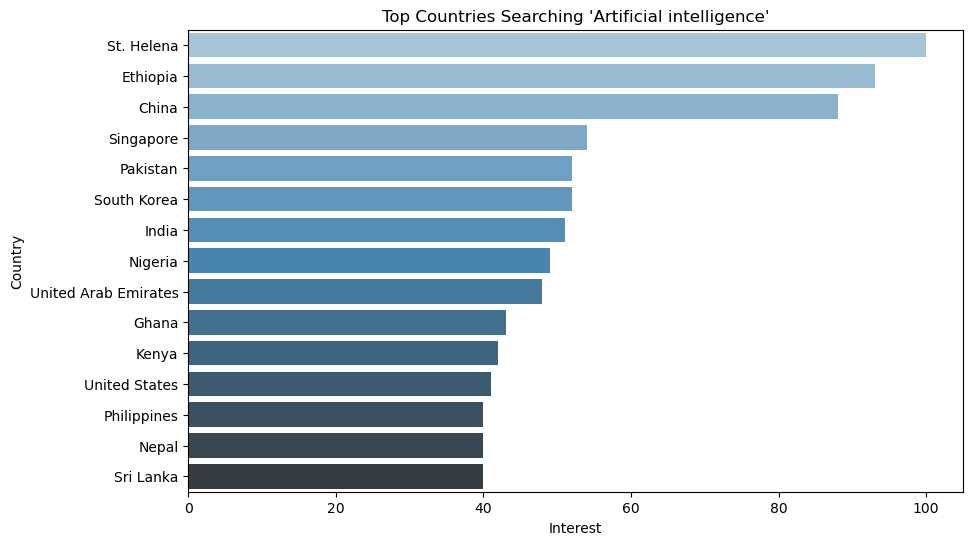

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# Choropleth (World Map Plot)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2304\835387550.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



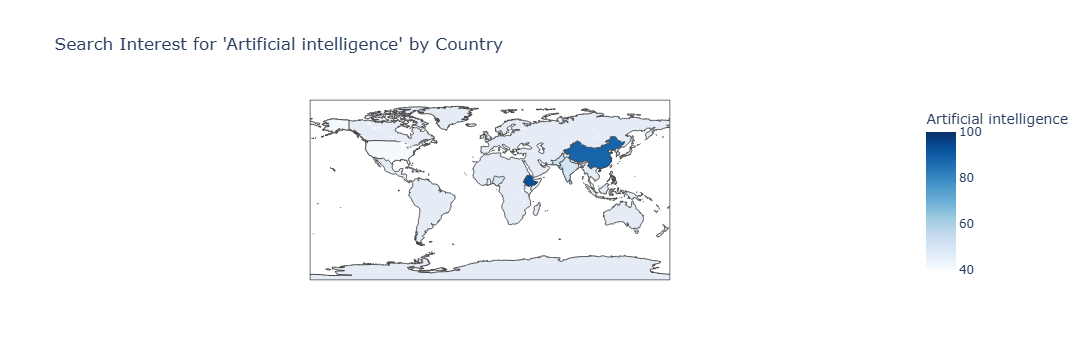

In [23]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                     locations='geoName',
                     locationmode='country names',
                     color=keyword,
                     title=f"Search Interest for '{keyword}' by Country",
                     color_continuous_scale='Blues')
fig.show()


# Time_Wise_Interest

In [24]:
time_df = pytrends.interest_over_time()

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Line_Plot (Search_over_Time)

(array([20148., 20209., 20270., 20332., 20393., 20454., 20513.]),
 [Text(20148.0, 0, '2025-03'),
  Text(20209.0, 0, '2025-05'),
  Text(20270.0, 0, '2025-07'),
  Text(20332.0, 0, '2025-09'),
  Text(20393.0, 0, '2025-11'),
  Text(20454.0, 0, '2026-01'),
  Text(20513.0, 0, '2026-03')])

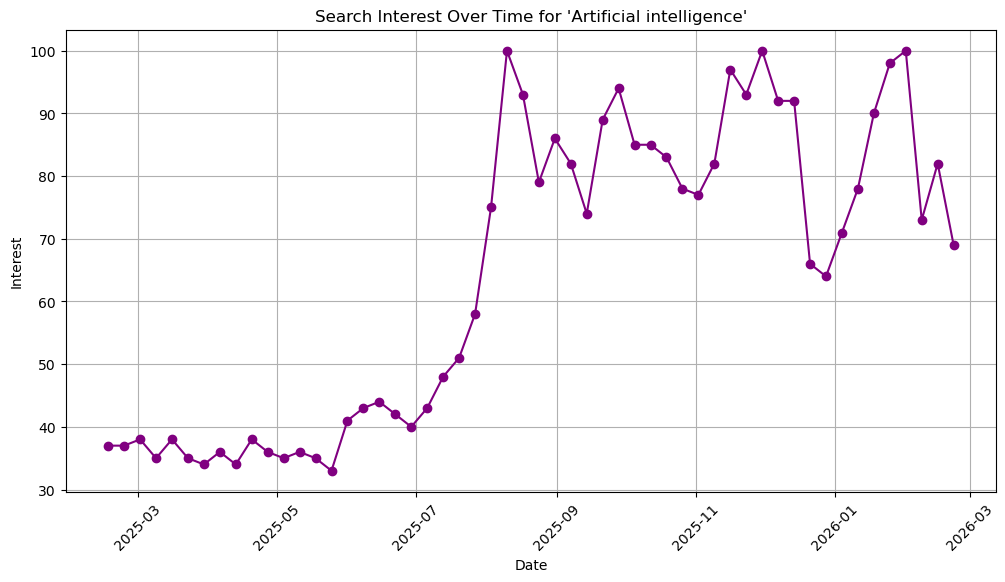

In [25]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)

# Comparing_Multiple_Keywords

In [17]:
kw_list = ["Data Analyst", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

# Comparison_PLot

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



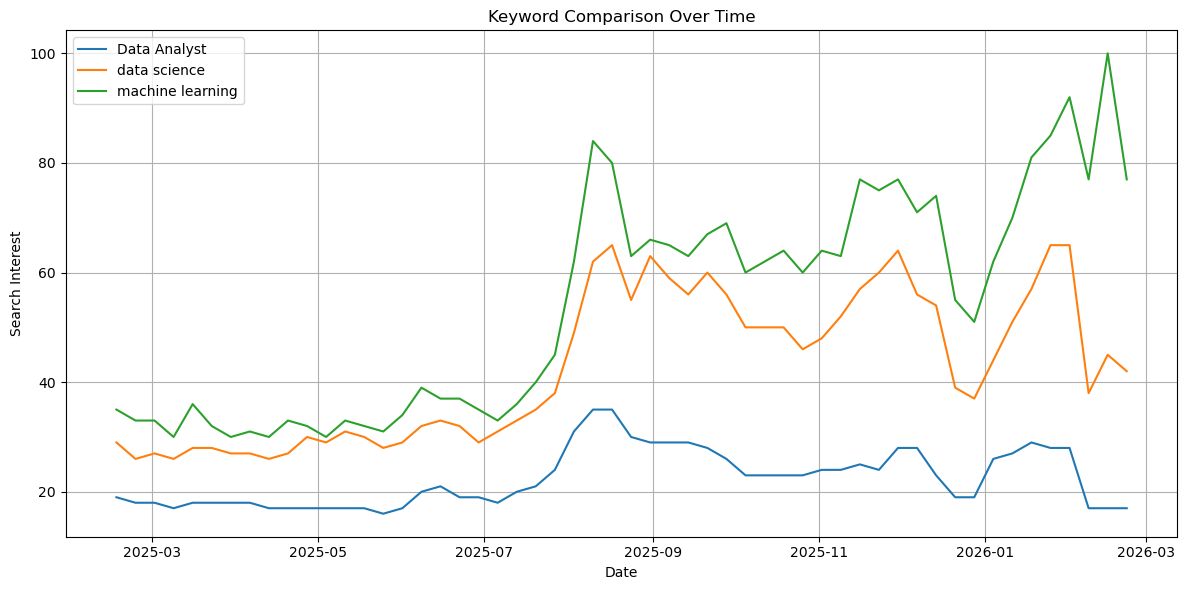

In [18]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)
plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
